# Coocurrence Network for Perceptual Scent Data


From a research article titled: *"Understanding the Odour Spaces: A Step towards Solving Olfactory Stimulus-Percept Problem"*, published in the plos one journal in 2015: doi.org/10.1371/journal.pone.0141263

*"We can describe each database as an undirected graph or network, where nodes are perceptual descriptors and an edge is shared by two perceptual descriptors if they have occurred together in the perceptual description of a molecule."*

*"**The important questions to be addressed with respect to the perceptual network are about its structural organisation, particularly, its difference from a random network and its degree distribution**. We also sought to understand whether the positioning of the perceptual descriptors is only due to their semantic relatedness."*

So for each dataset I aim to calculate the same network characteristics that these researchers used in their analysis and replicate their work on both their data, as well as newly released data. In the supplementary materials of their publication they included detailed methods of how they calculated the network statistics and how they compared it against random networks.

The aim of this exercise is to understand the quality of our data, and understand how the characteristics differ between data sources. Finally I would like to understand my results by comparing our networks to the networks constructed and analysed in 2015. 


## Data Sources analysed by Kumar Et al. 2015



<img src="database_descriptions.png">




## Network Characteristics from Kumar Et al. 2015

We are not going to calculate every column below - just the ones nessecary to compute the clustering coefficient and compare our networks with some randomly generated networks. From the paper:

*"The clustering coefficient can be used to differentiate the properties of the nodes from a random network. We have calculated the weighted clustering coefficient proposed by Barrat et al.[7]."*



<img src="network_descriptions.png">


### Columns
 
- Nodes (one for each percept that occurs at least once with another percept e.g. fish)
- Edges (one for each coocurrence between smells - multiple coocurrences are common and are accounted for by the weight of the edges)
- Average degree (A) is defined as two times the number of edges divided by the number of nodes
- Network diameter N(d) is the longest direct path between any two nodes in the network
- Average Path Length N(l)
- Graph Density D(g)
- α = Power law exponent
- X(min) = Power law cutoff degree
- r = Assortativity Coefficient
- **cl(avg) = Network Average Clustering Coefficient:** We will calculate this coefficient for each dataset.
- **R-cl(avg) = Random Clustering Coefficient:** We will calculate an average clustering coefficient from our random netowrks of equal nodes and edges to the corresponding perceptual network.

## Replicating Results and Verifying our Data Collection

The goal of this notebook is to calculate and compare the final two statistics in the image above for our data, namely: the global/average clustering coefficient and a corresponding average random clustering coefficient. We generate 1000 random graphs using the Erdős–Rényi G(n, M) model - where n is the number of nodes and M is the number of edges. The random graphs have an equal number of edges/nodes as the smell coocurrence graph that they are to be compared with.

We use a z-test to test whether the real network could have came from the distribution of 1000 random graphs (which should have a normally distributed average clustering coefficient due to the Central Limit Theorem). 



# Flavornet

This data was scraped from a live online database on 14th November 2017. The databse is available here: http://www.flavornet.org/flavornet.html


In [1]:
import json
import numpy as np
import pandas as pd

df = pd.read_json('/Users/admin/workspace/2018-mcm-kealyd2/data/flavornet.json') 

percepts = set()


In [2]:
for row in df.iterrows():
    u = row[1][2]
    string = u.encode('ascii','ignore')
    if ',' in string:
        strings = string.split(', ')
        for percept in strings:
            percepts.add(percept)
    else:
        percepts.add(string)
        
percepts

{'acid',
 'alcohol',
 'alkaline',
 'alkane',
 'almond',
 'almond shell',
 'amine',
 'anise',
 'apple',
 'apple peel',
 'apricot',
 'baked',
 'balsamic',
 'banana',
 'basil',
 'beet',
 'biscuit',
 'bitter',
 'bitter almond',
 'black currant',
 'boiled vegetable',
 'box tree',
 'bread',
 'broccoli',
 'brown sugar',
 'burnt',
 'burnt sugar',
 'butter',
 'butterscotch',
 'cabbage',
 'camomile',
 'camphor',
 'caramel',
 'caraway',
 'cardboard',
 'carrot',
 'cat',
 'celery',
 'cheese',
 'chemical',
 'cinnamon',
 'citrus',
 'clove',
 'cocoa',
 'coconut',
 'coffee',
 'cognac',
 'cologne',
 'cooked meat',
 'cooked potato',
 'cooked vegetable',
 'coriander',
 'cotton candy',
 'coumarin',
 'cream',
 'crushed bug',
 'cucumber',
 'curry',
 'dill',
 'dust',
 'earth',
 'ester',
 'ether',
 'fat',
 'fecal',
 'fennel',
 'fish',
 'flower',
 'foxy',
 'fresh',
 'fried',
 'fruit',
 'garlic',
 'gasoline',
 'geranium',
 'grape',
 'grapefruit',
 'grass',
 'green',
 'green bean',
 'green leaf',
 'green pepper',

In [3]:
bipartite = pd.DataFrame(None, None, percepts)

In [4]:
bipartite.columns

Index([u'turpentine', u'urine', u'thyme', u'green tea', u'fecal', u'fennel',
       u'paper', u'seaweed', u'earth', u'bitter almond',
       ...
       u'cognac', u'metal', u'rancid', u'green', u'camphor', u'pineapple',
       u'fresh', u'baked', u'magnolia', u'wine'],
      dtype='object', length=196)

In [5]:
rows = pd.DataFrame([[0 for col in range(196)]], df['CAS_no'])
rows.columns = bipartite.columns
bipartite = rows

In [6]:
for row in df.iterrows():
    u = row[1][2]
    cas = row[1][0]
    string = u.encode('ascii','ignore')
    
    if ',' in string:
        strings = string.split(', ')
        for percept in strings:
            bipartite[percept][cas] = 1
                    
    else:
        bipartite[string][cas] = 1
    

In [7]:
bipartite

,turpentine,urine,thyme,green tea,fecal,fennel,paper,seaweed,earth,bitter almond,...,cognac,metal,rancid,green,camphor,pineapple,fresh,baked,magnolia,wine
CAS_no,,,,,,,,,,,,,,,,,,,,,
75-50-3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
75-07-0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74-93-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
123-38-6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
109-66-0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71-23-8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
75-18-3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
109-94-4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78-93-3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
cooc = bipartite.transpose().dot(bipartite) # - create co-occurence matrix
cooc

,turpentine,urine,thyme,green tea,fecal,fennel,paper,seaweed,earth,bitter almond,...,cognac,metal,rancid,green,camphor,pineapple,fresh,baked,magnolia,wine
turpentine,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
urine,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
thyme,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
green tea,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
fecal,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
fennel,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
paper,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
seaweed,0,0,0,0,0,0,0,3,0,0,...,0,0,0,1,0,0,0,0,0,0
earth,0,0,0,0,0,0,0,0,22,0,...,0,0,0,3,1,0,0,0,0,0
bitter almond,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Make a copy of the cooc matrix
cooc_zero_diagonal = cooc.copy()
# Remove diagonal entries - these correspond to the total frequency of each word
np.fill_diagonal(cooc_zero_diagonal.values, 0)
cooc_zero_diagonal

,turpentine,urine,thyme,green tea,fecal,fennel,paper,seaweed,earth,bitter almond,...,cognac,metal,rancid,green,camphor,pineapple,fresh,baked,magnolia,wine
turpentine,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
urine,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
thyme,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
green tea,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
fecal,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
fennel,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
paper,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
seaweed,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
earth,0,0,0,0,0,0,0,0,0,0,...,0,0,0,3,1,0,0,0,0,0
bitter almond,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
edges = 0
nodes = 0
total_weight = 0
avg_weight_per_node = 0

for i in cooc_zero_diagonal.index:
    if cooc_zero_diagonal[i].sum(axis=0) > 0:
        nodes += 1
        for j in cooc_zero_diagonal.columns:
            if cooc_zero_diagonal[i][j] > 0:
                edges += 1
                total_weight += cooc_zero_diagonal[i][j]

#  Average weight = total weight / amount of nodes + 0.00 to convert int to float                
avg_weight_per_node = total_weight/(nodes + 0.00)

avg_degree = (2 * edges) / (nodes + 0.00)

graph_density = avg_degree / (nodes-1)
            

## Using networkX for network analysis and comparrison with Random Networks

In [99]:
%matplotlib inline
import networkx as nx

cooc_matrix = cooc_zero_diagonal.values

square_matrix_size = cooc_matrix[0].size

adj_matrix = np.zeros((square_matrix_size, square_matrix_size), dtype=np.int64)

0

In [160]:
# Build adjacency Matrix from Cooccurrence Matrix 
for i in range(0, square_matrix_size):
    for j in range(0, square_matrix_size):
        if cooc_matrix[i][j] > 0:
            adj_matrix[i][j] = 1
            
adj_matrix_df = pd.DataFrame(data=adj_matrix, index=cooc_zero_diagonal.index, columns=cooc_zero_diagonal.index, dtype=None, copy=False)
            
adj_matrix_df.index[176]

'fruit'

Nodes: 196
Edges: 465


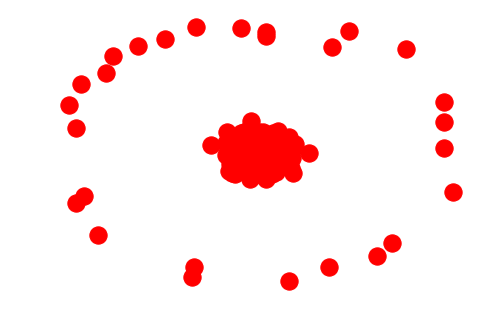

In [189]:
import matplotlib.pyplot as plt

Adj = nx.from_numpy_matrix(adj_matrix)

print("Nodes: " + len(Adj).__str__())
print("Edges: " + Adj.size().__str__())

nx.draw(Adj)

In [137]:
avg_clustering_coef = nx.average_clustering(Adj)
avg_clustering_coef

0.33760226997716725

In [148]:
# Now we add the weights to the graph and calculate the average weighted clustering coefficient

# Use Cooccurrence Matrix to add weights to adjacency network
# Builds our Cooccurence Network (Weighted Adjacency Network)
for i in range(0, square_matrix_size):
    for j in range(0, square_matrix_size):
        if cooc_matrix[i][j] > 0:
            Adj.edges[i, j]['weight'] = cooc_matrix[i][j]

In [158]:
Adj.edges(data=True)


EdgeDataView([(0, 130, {'weight': 1}), (0, 37, {'weight': 1}), (0, 71, {'weight': 1}), (0, 162, {'weight': 2}), (0, 47, {'weight': 1}), (0, 176, {'weight': 1}), (0, 17, {'weight': 1}), (0, 20, {'weight': 1}), (0, 153, {'weight': 1}), (0, 28, {'weight': 1}), (2, 17, {'weight': 1}), (2, 66, {'weight': 1}), (3, 65, {'weight': 1}), (3, 20, {'weight': 1}), (4, 116, {'weight': 1}), (4, 109, {'weight': 1}), (5, 153, {'weight': 1}), (5, 115, {'weight': 1}), (7, 59, {'weight': 1}), (7, 148, {'weight': 1}), (7, 78, {'weight': 1}), (7, 54, {'weight': 1}), (7, 189, {'weight': 1}), (8, 65, {'weight': 2}), (8, 130, {'weight': 4}), (8, 67, {'weight': 1}), (8, 70, {'weight': 1}), (8, 38, {'weight': 1}), (8, 113, {'weight': 1}), (8, 17, {'weight': 1}), (8, 178, {'weight': 2}), (8, 20, {'weight': 3}), (8, 190, {'weight': 1}), (8, 150, {'weight': 1}), (8, 24, {'weight': 1}), (8, 189, {'weight': 3}), (8, 126, {'weight': 1}), (10, 96, {'weight': 1}), (10, 160, {'weight': 1}), (10, 71, {'weight': 1}), (10, 

In [163]:
avg_weighted_clustering_coef = nx.average_clustering(Adj, weight='weight')
avg_weighted_clustering_coef

0.030541248072555895

In [255]:
# Build Random Networks for comparison using Erdos Renyi (n, M) model

import operator as op
def ncr(n, r):
    r = min(r, n-r)
    numer = reduce(op.mul, xrange(n, n-r, -1), 1)
    denom = reduce(op.mul, xrange(1, r+1), 1)
    return numer//denom

p = Adj.size()/float(ncr(len(Adj), 2))  

random_graphs = []

for i in range(0,999):
    random_graphs.append(nx.erdos_renyi_graph(len(Adj), p))

In [206]:
random_clustering_coeffs = []

for graph in random_graphs:
    random_clustering_coeffs.append(nx.average_clustering(graph))

In [219]:
from statsmodels.stats import weightstats as stests

z_score, p_val = stests.ztest(random_clustering_coeffs, value = avg_clustering_coef)

random_graph_mean_CC = sum(random_clustering_coeffs) / len(random_clustering_coeffs)


In [225]:
print('Flavornet Network\n')

print("Total Smells in Dataset:" + len(cooc_zero_diagonal.index).__str__() + "\n")
print('Total Edges: ' + edges.__str__())
print('Total Nodes: ' + nodes.__str__())
print('Total Weight: ' + total_weight.__str__())
print('Average Weight (per node): ' + avg_weight_per_node.__str__() + '\n')
print('Average Degree: ' + avg_degree.__str__())
print('Graph Density: ' + graph_density.__str__())
print('Average Clustering Coefficient: ' + avg_clustering_coef.__str__())
print('Average Weighted Clustering Coefficient: (Onnela et al) ' + avg_weighted_clustering_coef.__str__() + "\n")

print("Average Clustering Coefficient of Random Graphs:" + random_graph_mean_CC.__str__())
print("Z-score for comparing real network with random distribution: " + z_score.__str__())
print("p-value for Z-test (too small to display): " + p_val.__str__())



Flavornet Network

Total Smells in Dataset:196

Total Edges: 930
Total Nodes: 171
Total Weight: 1354
Average Weight (per node): 7.918128654970761

Average Degree: 10.8771929825
Graph Density: 0.0639834881321
Average Clustering Coefficient: 0.337602269977
Average Weighted Clustering Coefficient: (Onnela et al) 0.030541248072555895

Average Clustering Coefficient of Random Graphs:0.0230816313158
Z-score for comparing real network with random distribution: -1431.6266150633473
p-value for Z-test (too small to display): 0.0


## Results

Our results closely match those of the PLOS one paper from 2015. These results help us to establish that:

- A) Our data collection and coocurrence network were completed succesfully, helping to verify previous work and our own dataset
- B) The data collected is signifficanly different to a random network

Our Average Clustering Coefficient was 0.3376... compared to 0.34 from the previous research. 

Our Average Clustering Coefficient for Random Graphs was 0.02308... compared to 0.0223 reported in the previous experiments.

The z-test tells us that our real network's value for the average clustering coefficient is 1431 standard deviations away from the mean of the normally distributed values for the corresponding random graphs. The probability that our real network comes from this distribution is too small to display (due to the limits of floating point numbers) i.e. diplayed as 0.0

The slight differences in the number of nodes/edges collected (2015 vs present) and the random nature of the graph generation explain the small variation in our results.